In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset (Assuming the file is in CSV format)
# If using Google Colab, uncomment the next two lines to upload the file.
# from google.colab import files
# uploaded = files.upload() # Upload the CSV file here

# For local environment, load the CSV directly
simulated_data = pd.read_csv('coal_blasting_simulated_dataset.csv')  # Update the path as necessary

In [3]:
# Prepare the input (X) and output (y)
X = simulated_data.drop(columns=['Mean Fragment Size (X50) (m)'])  # Input features
y = simulated_data['Mean Fragment Size (X50) (m)']  # Target variable

In [4]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardizing the data (important for deep learning)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Building the deep learning model (ANN)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

D:\Anaconda\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - loss: 0.0987 - val_loss: 0.0373
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0302 - val_loss: 0.0421
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0312 - val_loss: 0.0350
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0219 - val_loss: 0.0270
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0111 - val_loss: 0.0274
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0115 - val_loss: 0.0284
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0126 - val_loss: 0.0258
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0089 - val_loss: 0.0216
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0067 - val_loss: 0.0194
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0052 - val_loss: 0.0189
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0065 - val_loss: 0.0182
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0050 - val_l

In [9]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Loss (MSE): {test_loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0399
Test Loss (MSE): 0.03993649780750275


In [10]:
# Predict on the test data
y_pred = model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [11]:
# Compare predicted and actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(comparison.head())

      Actual  Predicted
83  0.130055   0.233985
53  0.465765   0.093991
70  0.365468   0.263873
45  0.104398   0.412528
44  0.182569   0.629688


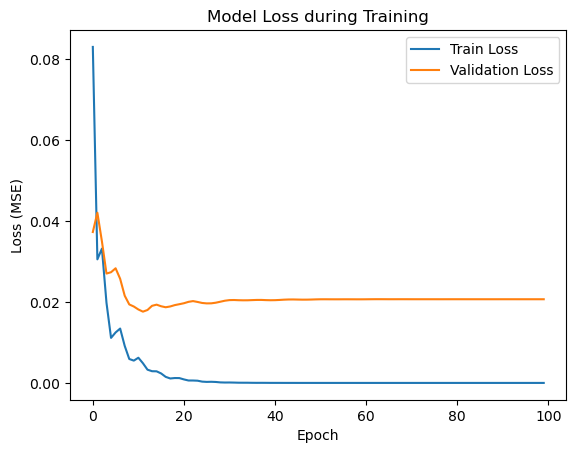

In [12]:
# Plotting Loss Curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss during Training')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

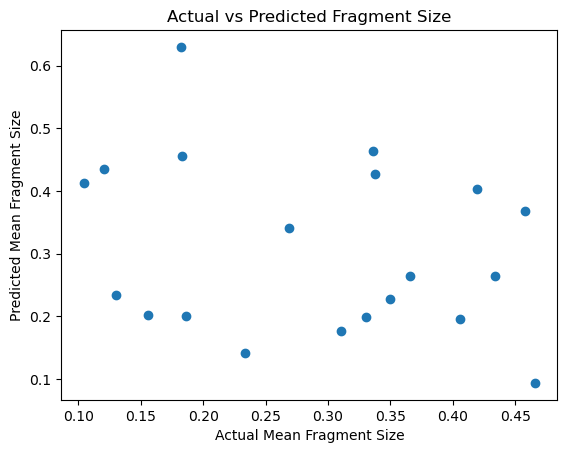

In [13]:
# Visualize the comparison between actual and predicted fragment sizes
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Mean Fragment Size')
plt.ylabel('Predicted Mean Fragment Size')
plt.title('Actual vs Predicted Fragment Size')
plt.show()